# Linear Regression

linear regression, a very simple approach for supervised learning. In particular, linear regression is a useful tool for predicting a quantitative response. In statistics, linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

- here theta/θ is used for estimator
- X - feature matrix (number_of_samples, number_of_features) (independent variable)
- y - target matrix (number_of_samples,) or (number_of_samples,1) (dependent variable)
- methods
    - Batch Gradient Descent
    - Stochastic Gradient Descent
    - Normal Equation
    
- for plots
    - matplotlib
    - seaborn
    
- for data, matrices and calculation
    - pandas
    - numpy
    - scipy
 

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston,load_diabetes
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [2]:
boston_dataset = load_boston()

In [3]:
df = pd.DataFrame(data=boston_dataset['data'],columns=boston_dataset.feature_names)
df['target'] = boston_dataset["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


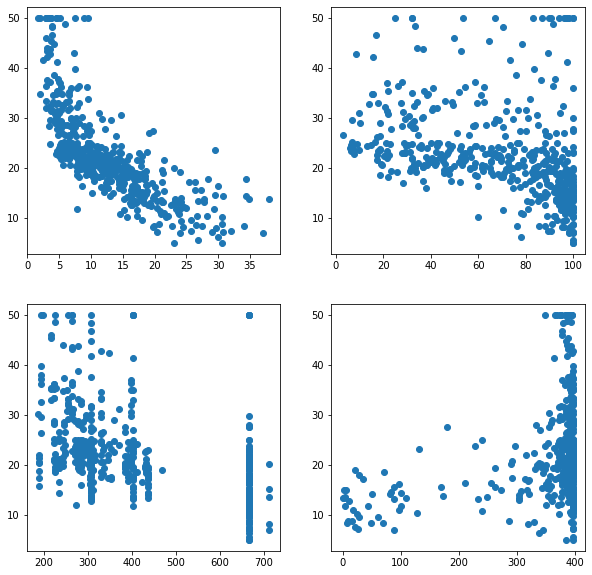

In [4]:
fig = plt.figure(figsize=(10,10))

fig.add_subplot(2,2,1).scatter(df["LSTAT"],df["target"])
fig.add_subplot(2,2,2).scatter(df["AGE"],df["target"])
fig.add_subplot(2,2,3).scatter(df["TAX"],df["target"])
fig.add_subplot(2,2,4).scatter(df["B"],df["target"])
plt.show()

- Shape of X
            
           X = (m,n)
           where 
               m = number of samples 
               n = number of features 


- choosing LSTAT for feature column X           
- setup X_0 (column 0 as 1) for linear regression ( θ_0 * X_0 + θ_1 * X_1  = θ_0 + θ_1 * X_1 )

In [5]:
def linear_model_format_X(X):
    if len(X.shape) == 1:
        X = X.copy().reshape(-1,1)
    
    return np.hstack(tup= ( np.ones(shape=(X.shape[0],1)) , X ) )

In [6]:
X_i = df['LSTAT'].values
X = linear_model_format_X(X_i)
y = df.target.values.reshape(-1,1)

print(X.shape, y.shape)

(506, 2) (506, 1)


In [7]:
n = X.shape[1]
m = y.shape[0]
print("number of columns (features) :",n)
print("number of samples (rows) :",m)

number of columns (features) : 2
number of samples (rows) : 506


## Using Gradient Descent

m = number of training samples(number of rows)
X = input features(matrix)
y = output target(matrix)


                training-set
                    |
                    V
                Learning algorithm
                    |
                    V
        test --->   h  ---> estimation
                (hypothesis)
        
        
`h(x) = θ_0 + θ_1 * X`

Affine Function = linear function + a constant

![linear_reg1](./images/linear_reg1.png)

In [8]:
def calculate_cost(y_pred,y):
    return np.mean(np.square(y_pred - y)) / 2 

### Gradient Descent Alogrithm

![linear_reg4](./images/linear_reg4.png)

### Batch Gradient Descent intuition
![linear_reg2](./images/linear_reg2.png)

![linear_reg5](./images/linear_reg5.png)

### Code implemnentation

In [9]:
arr = np.array([
    [1,2,3,4],
    [1,6,7,8],
    [1,11,12,13],
    [1,4,2,4],
    [1,5,2,1],
    [1,7,54,23]
])
arr.shape 

(6, 4)

- this means 3 rows and 4 columns (3 samples, 4 features)

In [10]:
np.sum(arr), np.sum(arr,axis=0), np.sum(arr,axis=1)

(174, array([ 6, 35, 80, 53]), array([10, 22, 37, 11,  9, 85]))

In [11]:
np.mean(arr), np.mean(arr,axis=0), np.mean(arr,axis=1)

(7.25,
 array([ 1.        ,  5.83333333, 13.33333333,  8.83333333]),
 array([ 2.5 ,  5.5 ,  9.25,  2.75,  2.25, 21.25]))

In [12]:
False not in (arr[...,0] == 1)

True

- for us calculation will be done column wise so axis = 0 everywhere

### Mean Squared Error / Root Mean Squared Error

In [13]:
def calculate_mse(y_pred,y):
    return np.mean(np.square(y_pred - y))


In [14]:
class LinearRegression:
    def __init__(self,alpha = 0.01 ,iterations = 10000):
        self.alpha = alpha
        self.iterations = iterations
        self._theta = None
        self._X = None
        self._y = None
        self._theta_history = None
        self._cost_history = None
    
    def _format_X_for_theta_0(self,X_i):
        
        X_i = X_i.copy()
        if len(X_i.shape) == 1:
            X_i = X_i.reshape(-1,1)
            
        if False in (X_i[...,0] == 1):        
            return np.hstack(tup=(np.ones(shape=(X_i.shape[0],1)) , X_i))
        else:
            return X_i
    
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y
    
    @property
    def theta(self):
        return self._theta
    
    @property
    def theta_history(self):
        return self._theta_history
    
    @property
    def cost_history(self):
        return self._cost_history
    
    def predict(self,X):
        format_X = self._format_X_for_theta_0(X)
        
        if format_X.shape[1] == self._theta.shape[0]:
            y_pred = format_X @ self._theta # (m,1) = (m,n) * (n,1)
            return y_pred
        elif format_X.shape[1] == self._theta.shape[1]:
            y_pred = format_X @ self._theta.T # (m,1) = (m,n) * (n,1)
            return y_pred
        else:
            raise ValueError("Shape is not proper.")
            
    
    def train(self, X, y, verbose=True, method="BGD", theta_precision = 0.001, batch_size=30):
        
        self._X = self._format_X_for_theta_0(X)
        self._y = y

        # number of features+1 because of theta_0
        self._n = self._X.shape[1]
        self._m = self._y.shape[0]

        self._theta_history = []
        self._cost_history = []

        if method == "BGD":
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                # calculate y_pred 
                y_pred = self.predict(self._X)
                
                # new θ to replace old θ
                new_theta = None

                # simultaneous operation 
                gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )
                new_theta = self._theta - (self.alpha *  gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_cost(y_pred = self.predict(X=self._X), y = self._y)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
                
        elif method == "SGD": # stochastic gradient descent
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                
                # creating indices for batches
                indices = np.random.randint(0,self._m,size=batch_size)
                
                # creating batch for this iteration
                X_batch = np.take(self._X,indices,axis=0)
                y_batch = np.take(self._y,indices,axis=0)
                
                # calculate y_pred 
                y_pred = self.predict(X_batch)
                # new θ to replace old θ
                new_theta = None

                # simultaneous operation 
                gradient = np.mean( ( y_pred - y_batch ) * X_batch, axis = 0 )
                new_theta = self._theta - (self.alpha *  gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_cost(y_pred = self.predict(X=X_batch), y = y_batch)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
                
        elif method == "NORMAL":
            self._theta = np.linalg.inv(self._X.T @ self._X) @ self._X.T @ self._y
            
        else:
            print("No Method Defined.")
      

In [15]:
            
def plot_regression_analysis(X,y,y_pred,theta,theta_history,cost_history):
    
    mse = calculate_mse(y_pred,y)
    rmse = np.sqrt(mse)
    
    print("MSE :",mse,"RMSE :",rmse)

    print("trained θ value :",theta)

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(2,2,1)
    ax.set(
        xlabel="iterations",
        ylabel="loss :j(θ)"
    )
    ax.plot(cost_history)
    ax.grid(alpha=0.5)

    ax = fig.add_subplot(2,2,2)
    ax.set(
        xlabel="feature",
        ylabel="target"
    )
    ax.scatter(X,y)
    ax.plot(X,y_pred,c='r',label="fit line")
    ax.legend(loc="best")
    ax.grid(alpha=0.5)

    ax = fig.add_subplot(2,2,(3,4))
    ax.set(
        ylabel="loss: j(θ)",
        xlabel="θ"
    )
    ax.plot(theta_history,cost_history)
    ax.grid(alpha=0.5)
    plt.show()

#### linear regression error function vs weights graph
![linear_reg3](./images/linear_reg3.png)

### debugging of gradient descent learning 

![linear_reg6](./images/linear_reg6.png)

if learning rate is big the theta value will shoot out.

In [16]:
def mse_calculation(y_pred,y):
    m = y.shape[0]
    mean_squared_error = np.sum(np.square(y_pred - y)) * (1/m)
    return mean_squared_error,mean_squared_error ** (1/2)

#### learning rate 0.01

random initial θ value : [[0.00041255 0.0006084 ]]


/home/nishant/.local/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-8-2a5b749a1bc7>:2: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y_pred - y)) / 2


breaking. found inf or nan.
MSE : inf RMSE : inf
trained θ value : [[-1.01743125e+302 -1.69466745e+303]]


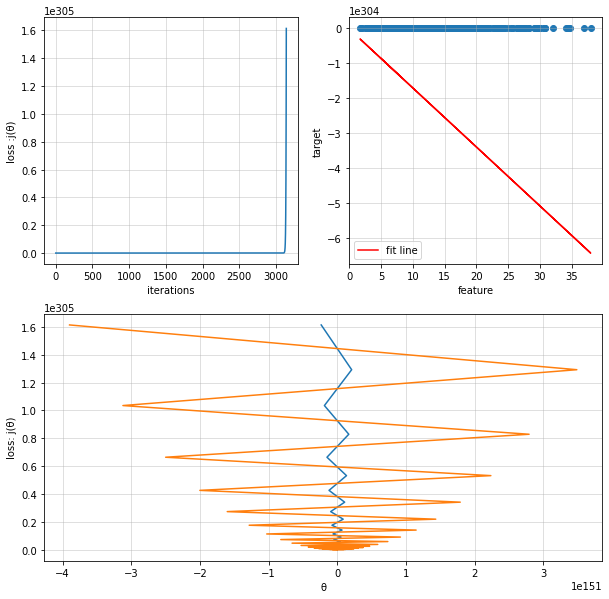

In [17]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

linear_reg_model1 = LinearRegression(alpha=0.01,iterations=10000)
linear_reg_model1.train(X=X_i, y=y, method="BGD")

y_pred = linear_reg_model1.predict(X_i)
theta = linear_reg_model1.theta
theta_history = linear_reg_model1.theta_history
cost_history = linear_reg_model1.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

- learning rate is high based on the data, and θ didn't converge and loss increased

#### learning rate 0.001

random initial θ value : [[0.00021211 0.00079452]]
MSE : 40.82628379489543 RMSE : 6.389544881671576
trained θ value : [[31.4369871  -0.76292211]]


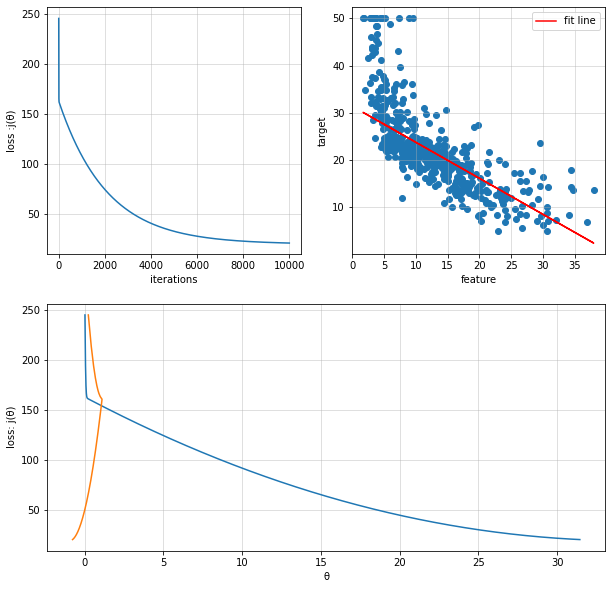

In [18]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

linear_reg_model2 = LinearRegression(alpha=0.001,iterations=10000)
linear_reg_model2.train(X=X_i, y=y, method="BGD")

y_pred = linear_reg_model2.predict(X_i)
theta = linear_reg_model2.theta
theta_history = linear_reg_model2.theta_history
cost_history = linear_reg_model2.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

#### learning rate 0.003

random initial θ value : [[0.00082195 0.00062579]]
MSE : 38.483123035465496 RMSE : 6.203476689362627
trained θ value : [[34.52842574 -0.9485235 ]]


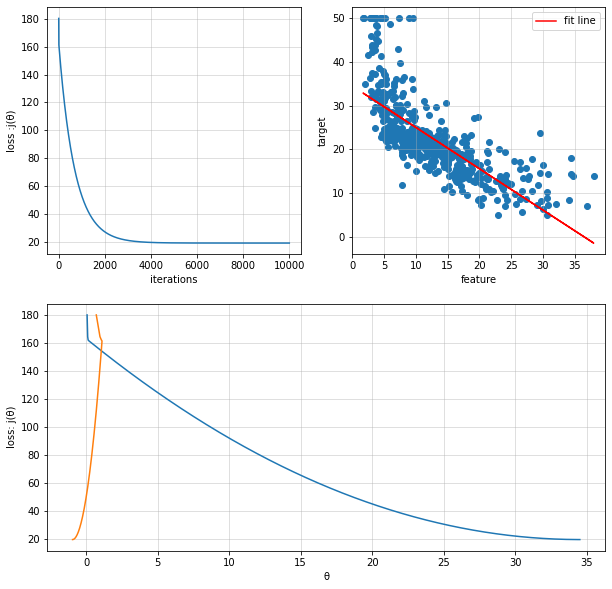

In [19]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

linear_reg_model3 = LinearRegression(alpha=0.003,iterations=10000)
linear_reg_model3.train(X=X_i, y=y, method="BGD")

y_pred = linear_reg_model3.predict(X_i)
theta = linear_reg_model3.theta
theta_history = linear_reg_model3.theta_history
cost_history = linear_reg_model3.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

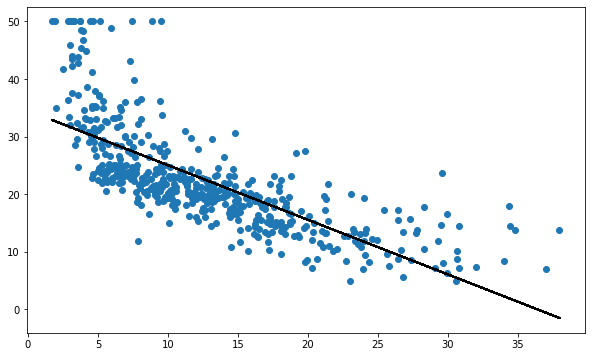

In [20]:
X_t = linear_reg_model3.X

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(X_i,y)
for theta_t in theta_history[-100:]:
    
    y_pred_t = X_t @ theta_t.T
    ax.plot(X_i,y_pred_t,c='black')
plt.show()

- 0.003 > 0.001. So on 0.003 it will converge earlier. 

### Stochastic Gradient Descent

Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.

- iterative method
- train over random samples of a batch size instead of training on whole dataset 
- faster convergence on large dataset
- see implementation in modelling class.

random initial θ value : [[0.00031589 0.00012551]]


/home/nishant/.local/lib/python3.8/site-packages/numpy/core/_methods.py:178: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-8-2a5b749a1bc7>:2: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(y_pred - y)) / 2


MSE : inf RMSE : inf
trained θ value : [[-7.46991253e+276 -1.70497656e+278]]


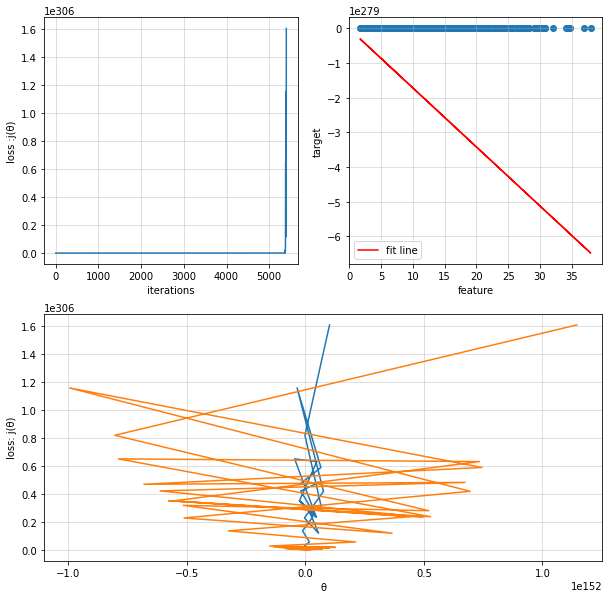

In [21]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

linear_reg_model_sgd = LinearRegression(alpha=0.01,iterations=10000)
linear_reg_model_sgd.train(X=X_i, y=y, method="SGD", batch_size=50)

y_pred = linear_reg_model_sgd.predict(X_i)
theta = linear_reg_model_sgd.theta
theta_history = linear_reg_model_sgd.theta_history
cost_history = linear_reg_model_sgd.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

random initial θ value : [[0.00057582 0.0006117 ]]
MSE : 38.4879507955829 RMSE : 6.2038657944529145
trained θ value : [[34.52823862 -0.94373174]]


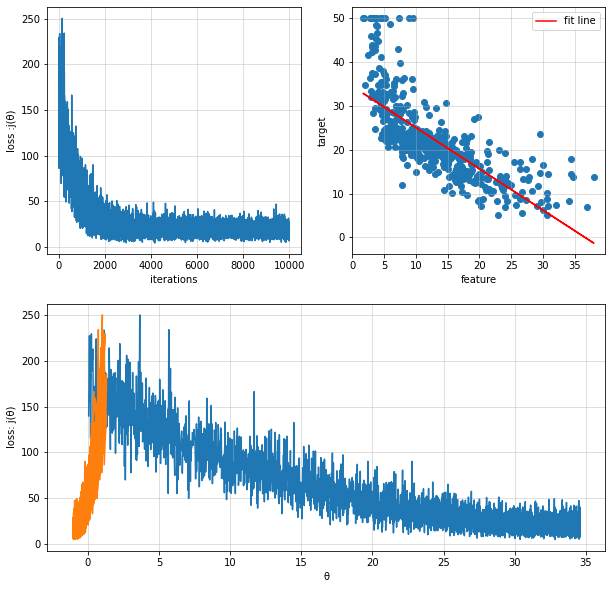

In [22]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

linear_reg_model_sgd = LinearRegression(alpha=0.003,iterations=10000)
linear_reg_model_sgd.train(X=X_i, y=y, method="SGD", batch_size=50)

y_pred = linear_reg_model_sgd.predict(X_i)
theta = linear_reg_model_sgd.theta
theta_history = linear_reg_model_sgd.theta_history
cost_history = linear_reg_model_sgd.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

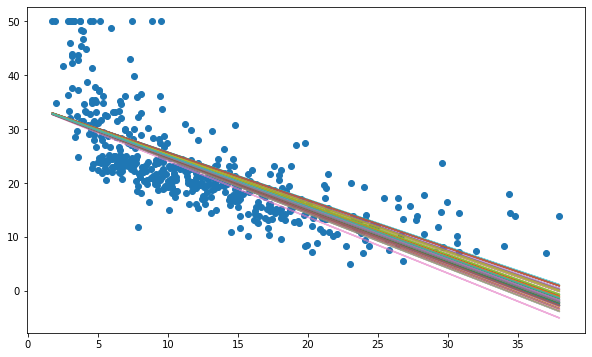

In [23]:
X_t = linear_reg_model_sgd.X

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(X_i,y)
for theta_t in theta_history[-50:]:
    
    y_pred_t = X_t @ theta_t.T
    ax.plot(X_i,y_pred_t,alpha=0.6)
plt.show()

## Using Normal Equation


`normal equation vs gradient descent`

| Gradient Descent | Normal Equation | 
| - | - | 
| Need to choose learning rate alpha | no need to choose alpha |
| needs iteration | doesn't need iterations |
| large features workds well ( n large ) | computation increases for large n |
| feature scaling will help in convergence | no need to do feature scaling |


```
θ = (X^T * X)^-1 * X^T * y
```

In [24]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

linear_reg_model4 = LinearRegression()
linear_reg_model4.train(X=X_i, y=y, method="NORMAL")

y_pred = linear_reg_model4.predict(X=X_i)
theta = linear_reg_model4.theta

In [25]:
theta.shape

(2, 1)

In [26]:
y_pred.shape

(506, 1)

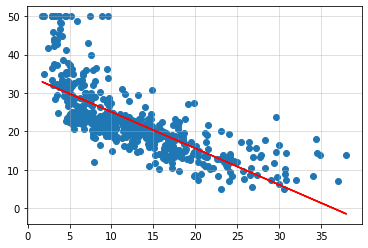

In [27]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r')
ax.grid(alpha=0.5)
plt.show()

# Ridge(L2 Regularization) Regression

- Regularization
    - keep all features, but reduce magnitude/ values of paramter θ_j
    - Workes well when we have a lot of features, each of which contributes a bit to predicting y.
 
![regularization_reg1](./images/regularization_reg1.png)

![regularization_reg3](./images/regularization_reg3.png)

![regularization_reg_2](./images/regularization_reg2.png)

In [28]:
class RidgeRegression:
    def __init__(self,alpha = 0.01 ,iterations = 10000):
        self.alpha = alpha
        self.iterations = iterations
        self._theta = None
        self._X = None
        self._y = None
        self._theta_history = None
        self._cost_history = None
    
    def _format_X_for_theta_0(self,X_i):
        
        X_i = X_i.copy()
        if len(X_i.shape) == 1:
            X_i = X_i.reshape(-1,1)
            
        if False in (X_i[...,0] == 1):        
            return np.hstack(tup=(np.ones(shape=(X_i.shape[0],1)) , X_i))
        else:
            return X_i
    
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y
    
    @property
    def theta(self):
        return self._theta
    
    @property
    def theta_history(self):
        return self._theta_history
    
    @property
    def cost_history(self):
        return self._cost_history
    
    def predict(self,X):
        format_X = self._format_X_for_theta_0(X)
        
        if format_X.shape[1] == self._theta.shape[0]:
            y_pred = format_X @ self._theta # (m,1) = (m,n) * (n,1)
            return y_pred
        elif format_X.shape[1] == self._theta.shape[1]:
            y_pred = format_X @ self._theta.T # (m,1) = (m,n) * (n,1)
            return y_pred
        else:
            raise ValueError("Shape is not proper.")
    
    def train(self, X, y, verbose=True, method="BGD", theta_precision = 0.001, penalty=1.0, batch_size=30):
        
        self._X = self._format_X_for_theta_0(X)
        self._y = y

        # number of features+1 because of theta_0
        self._n = self._X.shape[1]
        self._m = self._y.shape[0]

        self._theta_history = []
        self._cost_history = []

        if method == "BGD":
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                # calculate y_pred 
                y_pred = self.predict(self._X)
                # new θ to replace old θ
                new_theta = None

                # simultaneous operation 
                ################################################################################################################
                # little bit stretched out
                # new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m)) -  (penalty * theta * (1 / m) )
                
                gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )                
                new_theta = self._theta * (1 - (penalty/self._m) ) - (self.alpha * gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_cost(y_pred = self.predict(X=self._X), y = self._y)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
        elif method == "SGD":
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                
                indices = np.random.randint(0,self._m,size=batch_size)
                
                X_batch = np.take(self._X,indices,axis=0)
                y_batch = np.take(self._y,indices,axis=0)
                
                # calculate y_pred 
                y_pred = self.predict(X_batch)
                # new θ to replace old θ
                new_theta = None

                # simultaneous operation 
                gradient = np.mean( ( y_pred - y_batch) * X_batch, axis = 0 )                
                new_theta = self._theta * (1 - (penalty/self._m) ) - (self.alpha * gradient)

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_cost(y_pred = self.predict(X=X_batch), y = y_batch)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
                
        elif method == "NORMAL":
            self._theta = np.linalg.inv(self._X.T @ self._X + (penalty * np.identity(self._n))) @ self._X.T @ self._y
            
        else:
            print("No Method Defined.")

random initial θ value : [[8.05212025e-04 2.33095379e-06]]
MSE : 51.769373089219556 RMSE : 7.195093681754224
trained θ value : [[27.13210478 -0.50481865]]


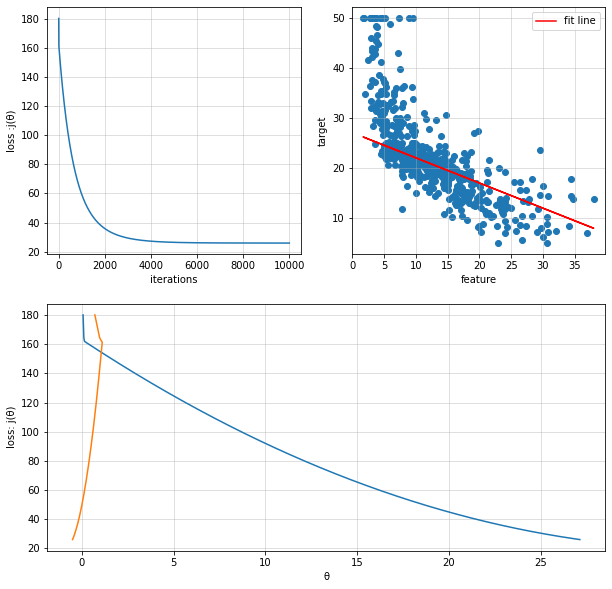

In [29]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

ridge_reg_model1 = RidgeRegression(alpha=0.003,iterations=10000)
ridge_reg_model1.train(X=X_i, y=y, method="BGD",penalty=0.1)

y_pred = ridge_reg_model1.predict(X_i)
theta = ridge_reg_model1.theta
theta_history = ridge_reg_model1.theta_history
cost_history = ridge_reg_model1.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

random initial θ value : [[0.00019    0.00085768]]
MSE : 46.15650086476867 RMSE : 6.793857583491772
trained θ value : [[29.27357797 -0.70043872]]


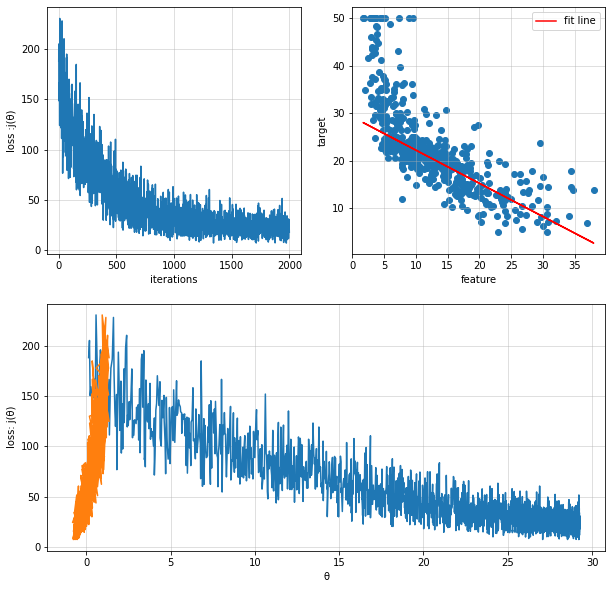

In [30]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

ridge_reg_model_sgd = RidgeRegression(alpha=0.006,iterations=2000)
ridge_reg_model_sgd.train(X=X_i, y=y, method="SGD", batch_size=50,penalty=0.1)

y_pred = ridge_reg_model_sgd.predict(X_i)
theta = ridge_reg_model_sgd.theta
theta_history = ridge_reg_model_sgd.theta_history
cost_history = ridge_reg_model_sgd.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

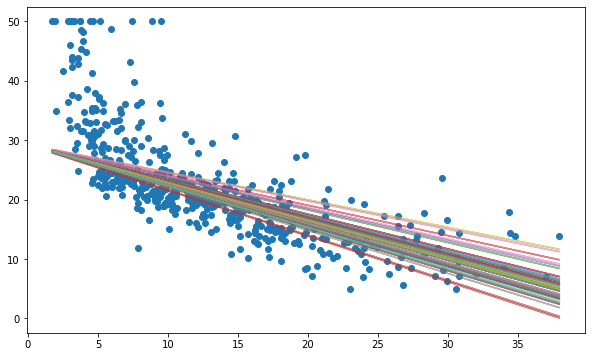

In [31]:
X_t = linear_reg_model_sgd.X

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(X_i,y)
for theta_t in theta_history[-50:]:
    
    y_pred_t = X_t @ theta_t.T
    ax.plot(X_i,y_pred_t,alpha=0.6)
plt.show()

## Using Normal Equation

```
θ = (X^T * X + lambda * I)^-1 * X^T * y
```

In [32]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

ridge_reg_model2 = RidgeRegression(alpha=0.003,iterations=10000)
ridge_reg_model2.train(X=X_i, y=y, method="NORMAL",penalty=0.1)

y_pred = ridge_reg_model2.predict(X_i)
theta = ridge_reg_model2.theta

In [33]:
theta.shape

(2, 1)

In [34]:
y_pred.shape

(506, 1)

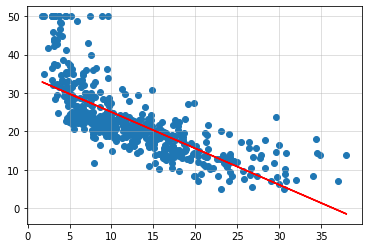

In [35]:
fig,ax = plt.subplots(1,1)
ax.scatter(X_i,y)
ax.plot(X_i,y_pred,c='r')
ax.grid(alpha=0.5)
plt.show()

# Lasso(L1 Regularization) Regression

Ridge regression does have one obvious disadvantage. Unlike best subset,forward stepwise, and backward stepwise selection, which will generallyselect models that involve just a subset of the variables, ridge regressionwill include allppredictors in the final model. The penalty will shrink all of the coefficients towards zero, but it will not set any of themexactly to zero (unlessλ=∞). This may not be a problem for predictionaccuracy, but it can create a challenge in model interpretation in settings inwhich the number of variables n is quite large.

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are scost_historyk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

![regularization_reg4](./images/regularization_reg4.png)

In [36]:
class LassoRegression:
    def __init__(self,alpha = 0.01 ,iterations = 10000):
        self.alpha = alpha
        self.iterations = iterations
        self._theta = None
        self._X = None
        self._y = None
        self._theta_history = None
        self._cost_history = None
    
    def _format_X_for_theta_0(self,X_i):
        
        X_i = X_i.copy()
        if len(X_i.shape) == 1:
            X_i = X_i.reshape(-1,1)
            
        if False in (X_i[...,0] == 1):        
            return np.hstack(tup=(np.ones(shape=(X_i.shape[0],1)) , X_i))
        else:
            return X_i
    
    @property
    def X(self):
        return self._X
    
    @property
    def y(self):
        return self._y
    
    @property
    def theta(self):
        return self._theta
    
    @property
    def theta_history(self):
        return self._theta_history
    
    @property
    def cost_history(self):
        return self._cost_history
    
    def predict(self,X):
        format_X = self._format_X_for_theta_0(X)
        
        if format_X.shape[1] == self._theta.shape[0]:
            y_pred = format_X @ self._theta # (m,1) = (m,n) * (n,1)
            return y_pred
        elif format_X.shape[1] == self._theta.shape[1]:
            y_pred = format_X @ self._theta.T # (m,1) = (m,n) * (n,1)
            return y_pred
        else:
            raise ValueError("Shape is not proper.")
            
    
    def train(self, X, y, verbose=True, method="BGD", theta_precision = 0.001, penalty=1.0,batch_size=30):
        
        self._X = self._format_X_for_theta_0(X)
        self._y = y

        # number of features+1 because of theta_0
        self._n = self._X.shape[1]
        self._m = self._y.shape[0]

        self._theta_history = []
        self._cost_history = []

        if method == "BGD":
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                # calculate y_pred 
                y_pred = self.predict(self._X)
                # new θ to replace old θ
                new_theta = np.zeros_like(self._theta)

                # simultaneous operation 
                ################################################################################################################
                # little bit stretched out
                # new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m)) -  (penalty * (1 / m) )
                
                gradient = np.mean( ( y_pred - self._y ) * self._X, axis = 0 )                
                new_theta = self._theta - (self.alpha * gradient) - (penalty/self._m) 

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_cost(y_pred = self.predict(X=self._X), y = self._y)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
                
        elif method == "SGD":
            self._theta = np.random.rand(1,self._n) * theta_precision
            if verbose: print("random initial θ value :",self._theta)
            
            for iteration in range(self.iterations):
                
                indices = np.random.randint(0,self._m,size=batch_size)
                
                X_batch = np.take(self._X,indices,axis=0)
                y_batch = np.take(self._y,indices,axis=0)
                
                # calculate y_pred 
                y_pred = self.predict(X_batch)
                # new θ to replace old θ
                new_theta = None
                
                # simultaneous operation 
                ################################################################################################################
                # little bit stretched out
                # new_theta = theta - (alpha * np.sum( ( y_pred - y ) * X, axis = 0 ) * (1 / m)) -  (penalty * (1 / m) )
                
                gradient = np.mean( ( y_pred - y_batch ) * X_batch, axis = 0 )                
                new_theta = self._theta - (self.alpha * gradient) - (penalty/self._m) 

                if np.isnan(np.sum(new_theta)) or np.isinf(np.sum(new_theta)):
                    print("breaking. found inf or nan.")
                    break
                # override with new θ 
                self._theta = new_theta

                # calculate cost to put in history
                cost = calculate_cost(y_pred = self.predict(X=X_batch), y = y_batch)
                self._cost_history.append(cost)

                # calcualted theta in history
                self._theta_history.append(self._theta[0])
                
        else:
            print("No Method Defined.")
    

random initial θ value : [[0.00040942 0.00058459]]
MSE : 38.502163450183055 RMSE : 6.205011156330265
trained θ value : [[34.27188609 -0.93345135]]


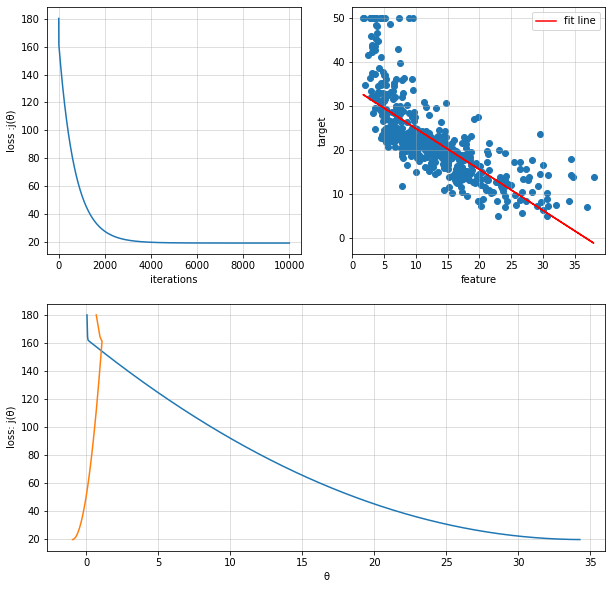

In [37]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

lasso_reg_model1 = LassoRegression(alpha=0.003,iterations=10000)
lasso_reg_model1.train(X=X_i, y=y, method="BGD",penalty=0.1)

y_pred = lasso_reg_model1.predict(X_i)
theta = lasso_reg_model1.theta
theta_history = lasso_reg_model1.theta_history
cost_history = lasso_reg_model1.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

random initial θ value : [[4.56142947e-04 7.02248295e-05]]
MSE : 39.52348714282612 RMSE : 6.286770804063571
trained θ value : [[32.60393636 -0.85730019]]


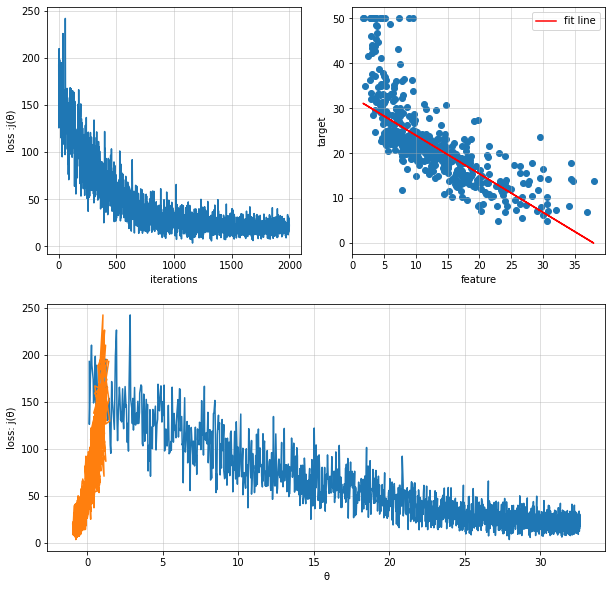

In [38]:
X_i = df['LSTAT'].values
y = df.target.values.reshape(-1,1)

lasso_reg_model_sgd = LassoRegression(alpha=0.006,iterations=2000)
lasso_reg_model_sgd.train(X=X_i, y=y, method="SGD", batch_size=50,penalty=0.1)

y_pred = lasso_reg_model_sgd.predict(X_i)
theta = lasso_reg_model_sgd.theta
theta_history = lasso_reg_model_sgd.theta_history
cost_history = lasso_reg_model_sgd.cost_history

plot_regression_analysis(X=X_i,y=y,y_pred=y_pred,theta=theta,theta_history=theta_history,cost_history=cost_history)

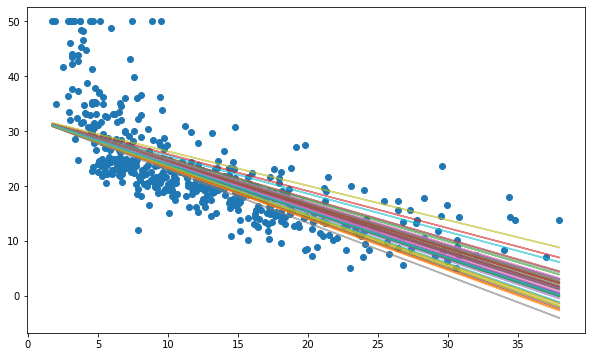

In [39]:
X_t = lasso_reg_model_sgd.X

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.scatter(X_i,y)
for theta_t in theta_history[-50:]:
    
    y_pred_t = X_t @ theta_t.T
    ax.plot(X_i,y_pred_t,alpha=0.6)
plt.show()

# Comparing Linear, Lasso, Ridge Regression 

## Data 1 model analysis 

In [40]:
X_i = df[["RM","AGE","DIS","LSTAT"]].values
y = boston_dataset.target.reshape(-1,1)

X_i.shape,y.shape

((506, 4), (506, 1))

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_i,y,random_state=0,test_size=30)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((476, 4), (30, 4), (476, 1), (30, 1))

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)

X_scaled.shape,X_scaled_test.shape

((476, 4), (30, 4))

### linear regression model training

random initial θ value : [[2.90433673e-04 8.48808232e-04 1.56421716e-04 4.70593899e-05
  1.77196973e-04]]
MSE : 29.04524548187663 RMSE : 5.389364107376363
trained θ value : [[22.49773966  3.57664343 -0.84608938 -1.08329154 -4.38606624]]


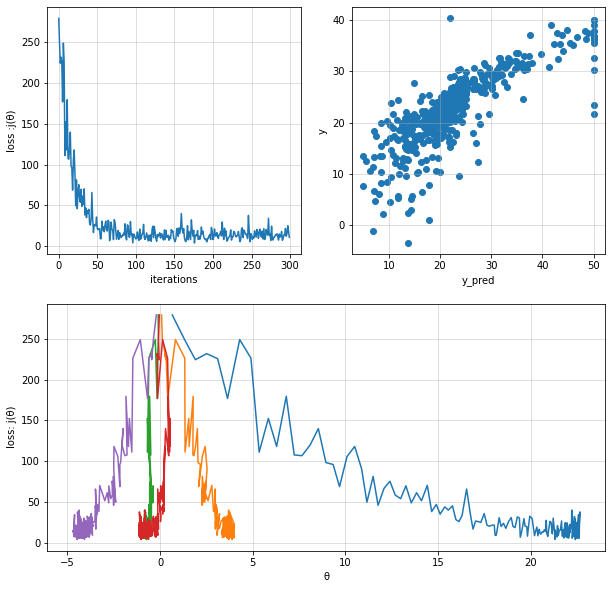

In [43]:
linear_reg_comp_model = LinearRegression(alpha=0.03,iterations=300)
linear_reg_comp_model.train(X=X_scaled, y=y_train, method="SGD")

y_linear = linear_reg_comp_model.y
y_pred_linear = linear_reg_comp_model.predict(X_scaled)
theta_linear = linear_reg_comp_model.theta
theta_history_linear = linear_reg_comp_model.theta_history
cost_history_linear = linear_reg_comp_model.cost_history


mse= calculate_mse(y_pred_linear,y_train)
rmse = np.sqrt(mse)
print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_linear)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_linear)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)

ax.scatter(y_linear,y_pred_linear)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_linear,cost_history_linear)
ax.grid(alpha=0.5)
plt.show()

### lasso regression model training

random initial θ value : [[2.21804915e-04 4.19265826e-05 4.62962497e-04 9.47748461e-05
  2.80006570e-04]]
MSE : 29.114539666046355 RMSE : 5.39578906797202
trained θ value : [[22.58861881  3.63999733 -0.95349263 -1.49150378 -4.32373396]]


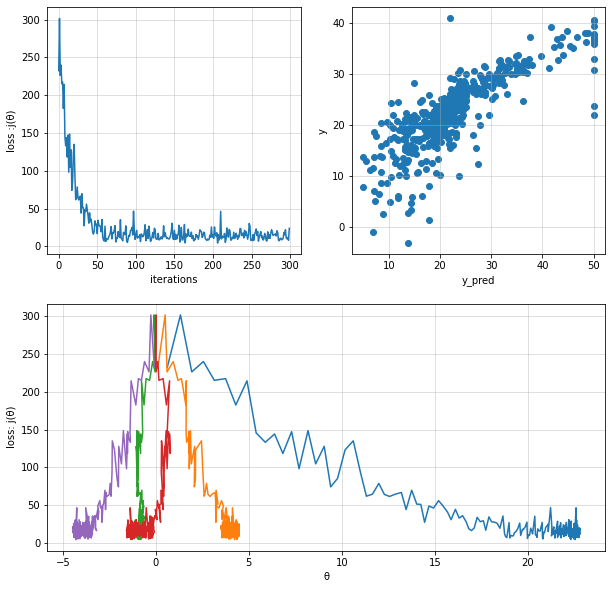

In [44]:
lasso_reg_comp_model = LassoRegression(alpha=0.03,iterations=300)
lasso_reg_comp_model.train(X=X_scaled, y=y_train, method="SGD",penalty=0.1)

y_lasso = lasso_reg_comp_model.y
y_pred_lasso = lasso_reg_comp_model.predict(X_scaled)
theta_lasso = lasso_reg_comp_model.theta
theta_history_lasso = lasso_reg_comp_model.theta_history
cost_history_lasso = lasso_reg_comp_model.cost_history


mse= calculate_mse(y_pred_lasso,y_lasso)
rmse = np.sqrt(mse)
print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_lasso)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_lasso)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_lasso,y_pred_lasso)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_lasso,cost_history_lasso)
ax.grid(alpha=0.5)
plt.show()

### ridge regression model training

random initial θ value : [[0.00042417 0.00059531 0.00073451 0.00075259 0.00021331]]
MSE : 29.051732311580857 RMSE : 5.389965891504403
trained θ value : [[22.4339132   3.77439167 -0.74098751 -1.32758415 -4.46594438]]


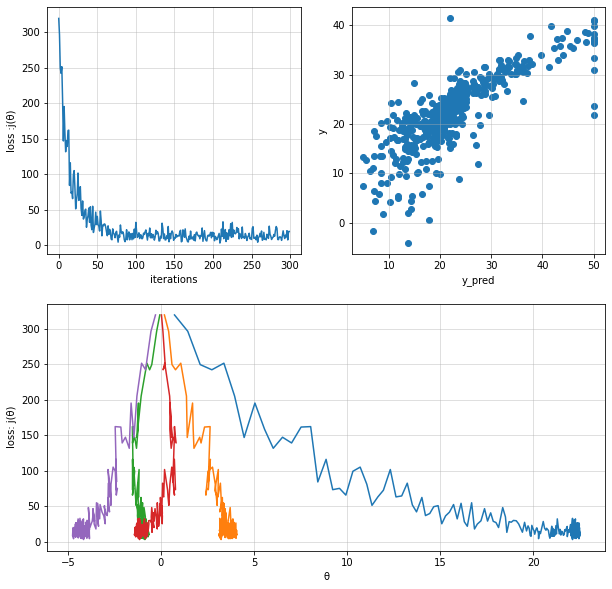

In [45]:
ridge_reg_comp_model = RidgeRegression(alpha=0.03,iterations=300)
ridge_reg_comp_model.train(X=X_scaled, y=y_train, method="SGD",penalty=0.1)

y_ridge = ridge_reg_comp_model.y
y_pred_ridge = ridge_reg_comp_model.predict(X_scaled)
theta_ridge = ridge_reg_comp_model.theta
theta_history_ridge = ridge_reg_comp_model.theta_history
cost_history_ridge = ridge_reg_comp_model.cost_history


mse= calculate_mse(y_pred_ridge,y_ridge)
rmse = np.sqrt(mse)
print("MSE :",mse,"RMSE :",rmse)

print("trained θ value :",theta_ridge)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
ax.set(
    xlabel="iterations",
    ylabel="loss :j(θ)"
)
ax.plot(cost_history_ridge)
ax.grid(alpha=0.5)

ax = fig.add_subplot(2,2,2)
ax.set(
    xlabel="y_pred",
    ylabel="y"
)
ax.scatter(y_ridge,y_pred_ridge)
ax.grid(alpha=0.5)


ax = fig.add_subplot(2,2,(3,4))
ax.set(
    ylabel="loss: j(θ)",
    xlabel="θ"
)
ax.plot(theta_history_ridge,cost_history_ridge)
ax.grid(alpha=0.5)
plt.show()

### linear regression model testing error

In [46]:
y_test_pred_linear = linear_reg_comp_model.predict(X_scaled_test)

mse= calculate_mse(y_test_pred_linear,y_test)
rmse = np.sqrt(mse)
print("MSE :",mse,"RMSE :",rmse)

MSE : 41.9343930042506 RMSE : 6.4756770305699005


### ridge regression model testing error

In [47]:
y_test_pred_ridge = ridge_reg_comp_model.predict(X_scaled_test) 
mse= calculate_mse(y_test_pred_ridge,y_test)
rmse = np.sqrt(mse)
print("MSE :",mse,"RMSE :",rmse)

MSE : 40.849939847933044 RMSE : 6.391395766805013


### lasso regression model testing error

In [48]:
y_test_pred_lasso = lasso_reg_comp_model.predict(X_scaled_test) 
mse= calculate_mse(y_test_pred_lasso,y_test)
rmse = np.sqrt(mse)
print("MSE :",mse,"RMSE :",rmse)

MSE : 41.1578184868983 RMSE : 6.415435954547306


### training data comparison

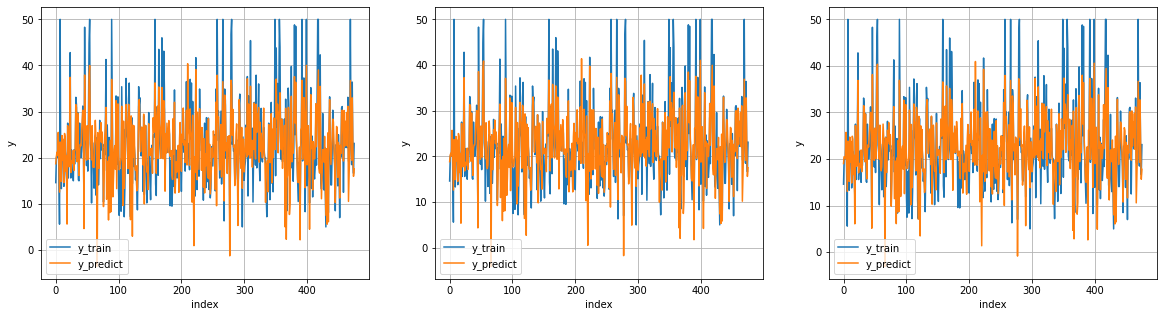

In [49]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_linear,label="y_predict")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_ridge,label="y_predict")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_train,label="y_train")
ax.plot(y_pred_lasso,label="y_predict")
ax.legend(loc="best")
ax.grid()

plt.show()

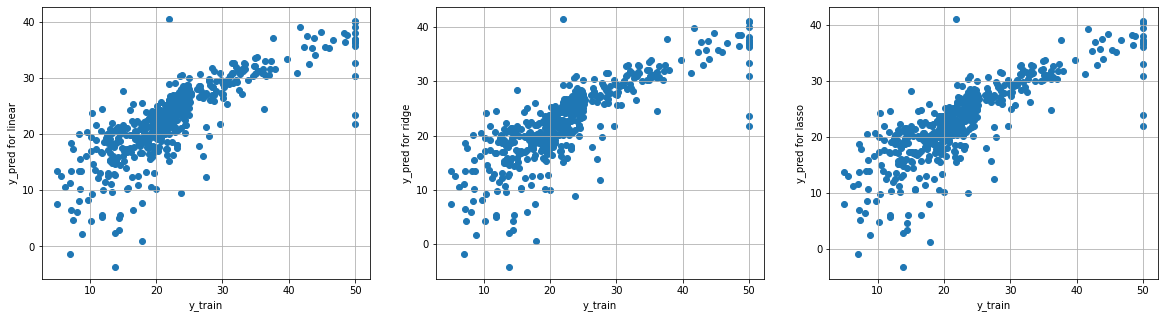

In [50]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_train",ylabel="y_pred for linear")
ax.scatter(y_train,y_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_train",ylabel="y_pred for ridge")
ax.scatter(y_train,y_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_train",ylabel="y_pred for lasso")
ax.scatter(y_train,y_pred_lasso)
ax.grid()

plt.show()

### testing data comparison

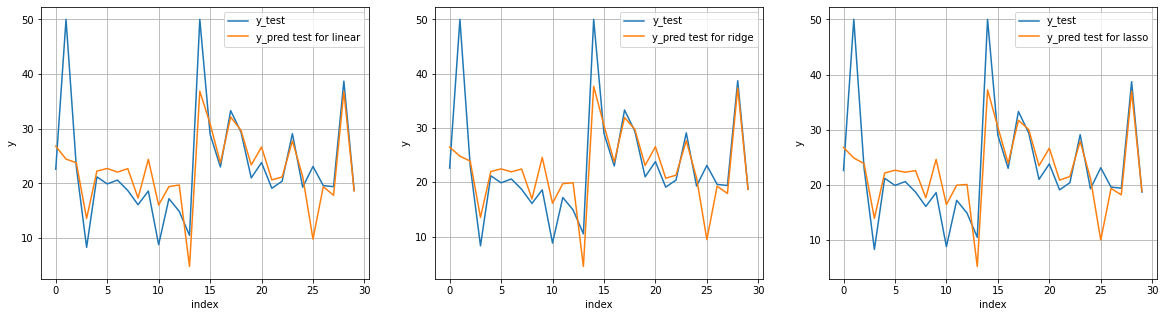

In [51]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_linear,label="y_pred test for linear")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_ridge,label="y_pred test for ridge")
ax.legend(loc="best")
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="index",ylabel="y")
ax.plot(y_test,label="y_test")
ax.plot(y_test_pred_lasso,label="y_pred test for lasso")
ax.legend(loc="best")
ax.grid()


plt.show()

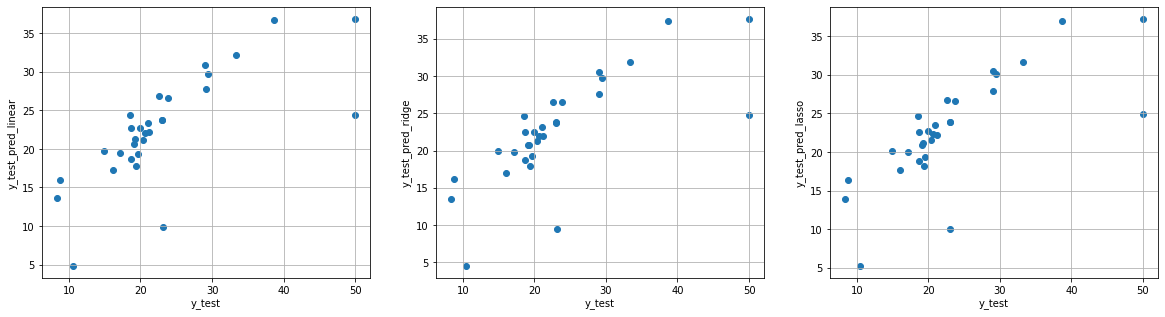

In [52]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_test",ylabel="y_test_pred_linear")
ax.scatter(y_test,y_test_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_test",ylabel="y_test_pred_ridge")
ax.scatter(y_test,y_test_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_test",ylabel="y_test_pred_lasso")
ax.scatter(y_test,y_test_pred_lasso)
ax.grid()

plt.show()

### models comparison

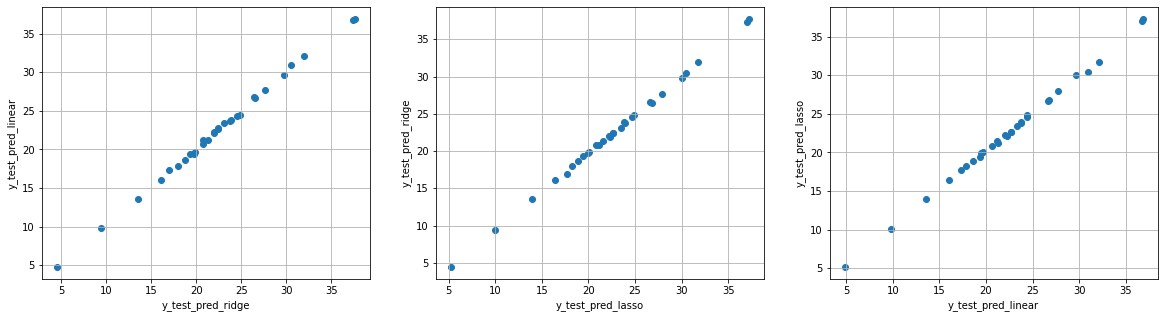

In [53]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(1,3,1)
ax.set(xlabel="y_test_pred_ridge",ylabel="y_test_pred_linear")
ax.scatter(y_test_pred_ridge,y_test_pred_linear)
ax.grid()

ax = fig.add_subplot(1,3,2)
ax.set(xlabel="y_test_pred_lasso",ylabel="y_test_pred_ridge")
ax.scatter(y_test_pred_lasso,y_test_pred_ridge)
ax.grid()

ax = fig.add_subplot(1,3,3)
ax.set(xlabel="y_test_pred_linear",ylabel="y_test_pred_lasso")
ax.scatter(y_test_pred_linear,y_test_pred_lasso)
ax.grid()

plt.show()